In [13]:
# Remove old directory if it exists
!rm -rf clip-caltech101-lightning

# Clone your repository (update YOUR_USERNAME/YOUR_REPO)
!git clone https://github.com/Miwi343/clip-caltech101-lightning.git
%cd clip-caltech101-lightning

# Verify structure
print("Files in repo:")
!ls -la

Cloning into 'clip-caltech101-lightning'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 47 (delta 14), reused 40 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 592.84 KiB | 2.73 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/clip-caltech101-lightning/clip-caltech101-lightning/clip-caltech101-lightning
Files in repo:
total 872
drwxr-xr-x 4 root root   4096 Nov 27 19:27 .
drwxr-xr-x 5 root root   4096 Nov 27 19:27 ..
-rw-r--r-- 1 root root  91803 Nov 27 19:27 Caltech101_Classification.ipynb
-rw-r--r-- 1 root root 766817 Nov 27 19:27 exploration.ipynb
drwxr-xr-x 8 root root   4096 Nov 27 19:27 .git
-rw-r--r-- 1 root root     44 Nov 27 19:27 .gitignore
-rw-r--r-- 1 root root     93 Nov 27 19:27 README.md
-rw-r--r-- 1 root root    916 Nov 27 19:27 requirements.txt
drwxr-xr-x 3 root root   4096 Nov 27 19:27 src


In [14]:
!pip install -r requirements.txt

In [15]:
import torch
import wandb


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [17]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

# Start Training

In [18]:
%cd /content/clip-caltech101-lightning
%pwd

/content/clip-caltech101-lightning


'/content/clip-caltech101-lightning'

In [19]:
print("Uncomment to run training again.")
# !python src/train.py

Uncomment to run training again.


# Evaluate Models

In [20]:
run = wandb.init(project="clip-caltech101")
artifact = run.use_artifact('clip-caltech101/model-zywt7a6a:v2', type='model')
model_dir = artifact.download()


wandb: Downloading large artifact 'model-zywt7a6a:v2', 577.84MB. 1 files...
wandb:   1 of 1 files downloaded.  
Done. 00:00:00.2 (3587.5MB/s)


In [21]:
print(model_dir)

/content/clip-caltech101-lightning/artifacts/model-zywt7a6a:v2


In [22]:
from src.model import CLIPClassifier
from src.data import get_transformation
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
model = CLIPClassifier.load_from_checkpoint(model_dir + "/model.ckpt")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [25]:
model.eval()
model.to('cuda')

CLIPClassifier(
  (clip_model): CLIPModel(
    (text_model): CLIPTextTransformer(
      (embeddings): CLIPTextEmbeddings(
        (token_embedding): Embedding(49408, 512)
        (position_embedding): Embedding(77, 512)
      )
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=512, out_features=512, bias=True)
              (v_proj): Linear(in_features=512, out_features=512, bias=True)
              (q_proj): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
            )
            (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): QuickGELUActivation()
              (fc1): Linear(in_features=512, out_features=2048, bias=True)
              (fc2): Linear(in_features=2048, out_features=512, bias=T

In [29]:
transform = get_transformation()


In [30]:
def classify_image(image_path):
    """Classify a single image"""
    img = Image.open(image_path)
    img_tensor = transform(img).unsqueeze(0).to('cuda')

    with torch.no_grad():
        logits = model(img_tensor)
        pred_idx = logits.argmax(dim=1).item()

    from src.data import load_dataset
    dataset = load_dataset()
    predicted_class = dataset.categories[pred_idx]

    # Show image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}", fontsize=16)
    plt.axis('off')
    plt.show()

    return predicted_class

Saving elephant.jpeg to elephant (1).jpeg

Classifying: elephant (1).jpeg


100%|██████████| 137M/137M [00:13<00:00, 10.1MB/s]


Loaded dataset.

Dataset Size: 8677

Categories:['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion'

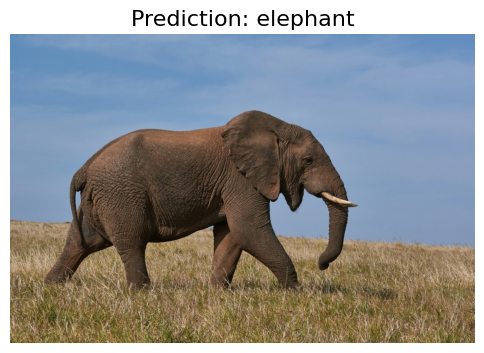

Result: elephant


In [31]:
from google.colab import files

# Upload image
uploaded = files.upload()

# Classify it
for filename in uploaded.keys():
    print(f"\nClassifying: {filename}")
    result = classify_image(filename)
    print(f"Result: {result}")